Creating dataframes for more visualizations

In [1]:
import pandas as pd

In this notebook I want to take my country text classification results and combine those with my project data to create visualizations that show the percent of articles about each category I selected stacked on top of each other as a line graph

I am going to start with the US dataframe

In [3]:
US_classification_df = pd.read_csv('US_text_classification.csv')

In [4]:
all_data = pd.read_csv('final-project-data2.csv')

In [5]:
US_data = all_data[all_data['country_code'].str.contains("US", case=False, na=False)]

In [6]:
df = pd.merge(US_data, US_classification_df[['qid', 'predicted_category']], on='qid', how='left')

In [7]:
df.head()

,date,country_code,article,qid,pageviews,lang_code,predicted_category
0,2023-03-15,US,Main_Page,Q5296,7132908,en,Place
1,2023-03-15,US,Main_Page,Q5296,7132908,en,Person
2,2023-03-15,US,Main_Page,Q5296,7132908,en,Person
3,2023-03-15,US,Main_Page,Q5296,7132908,en,Person
4,2023-03-15,US,Main_Page,Q5296,7132908,en,Event


In [23]:
# Group by date and predicted_category
US_daily_category_views = df.groupby(['date', 'predicted_category'])['pageviews'].sum().reset_index()

# Pivot so that each category is a column
US_daily_category_pivot = US_daily_category_views.pivot(index='date', columns='predicted_category', values='pageviews').fillna(0)

# Optional: convert index to datetime
US_daily_category_pivot.index = pd.to_datetime(US_daily_category_pivot.index)

# Calculate percentages
US_daily_category_pct = US_daily_category_pivot.div(US_daily_category_pivot.sum(axis=1), axis=0)


In [24]:
US_daily_category_pct.head()

predicted_category,Event,Person,Place,TV
date,,,,
2023-03-01,0.178411,0.562540,0.254473,0.004576
2023-03-02,0.164942,0.560940,0.271713,0.002405
2023-03-03,0.136979,0.582060,0.279167,0.001794
2023-03-04,0.142405,0.583803,0.270835,0.002957
2023-03-05,0.156511,0.585722,0.254622,0.003145


In [25]:
US_daily_category_pct.to_csv("US_daily_category_pct.csv")

In [26]:
test = pd.read_csv('US_daily_category_pct.csv')

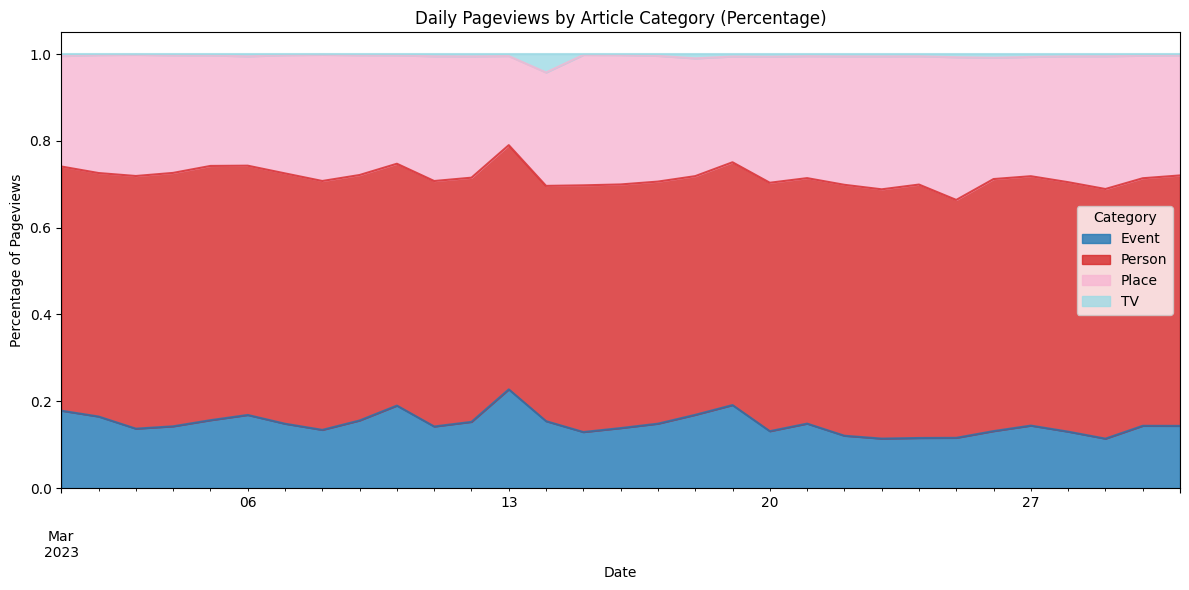

In [9]:
import matplotlib.pyplot as plt

# Stacked area plot
plt.figure(figsize=(12, 6))
daily_category_pct.plot.area(ax=plt.gca(), cmap='tab20', alpha=0.8)
plt.title('Daily Pageviews by Article Category (Percentage)')
plt.ylabel('Percentage of Pageviews')
plt.xlabel('Date')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

Now I need to do this for all my countries

In [67]:
JP_classification_df = pd.read_csv('JP_text_classification.csv')

In [68]:
JP_data = all_data[all_data['country_code'].str.contains("JP", case=False, na=False)]

In [69]:
JP_df = pd.merge(JP_data, JP_classification_df[['qid', 'predicted_category']], on='qid', how='left')

In [71]:
JP_df['predicted_category'] = JP_df['predicted_category'].replace({'人': 'Person', '場所': 'Place', 'イベント': 'Event', 'テレビ': 'TV'})

In [72]:
JP_df.head()

,date,country_code,article,qid,pageviews,lang_code,predicted_category
0,2023-03-25,JP,中村倫也,Q11365305,954022,ja,Person
1,2023-03-20,JP,道端ジェシカ,Q202756,910167,ja,Person
2,2023-03-10,JP,ヌートバー,Q107315831,527531,ja,Person
3,2023-03-10,JP,ヌートバー,Q107315831,527531,ja,Person
4,2023-03-10,JP,ヌートバー,Q107315831,527531,ja,Person


In [73]:
# Group by date and predicted_category
JP_daily_category_views = JP_df.groupby(['date', 'predicted_category'])['pageviews'].sum().reset_index()

# Pivot so that each category is a column
JP_daily_category_pivot = JP_daily_category_views.pivot(index='date', columns='predicted_category', values='pageviews').fillna(0)

# Optional: convert index to datetime
JP_daily_category_pivot.index = pd.to_datetime(JP_daily_category_pivot.index)

# Calculate percentages
JP_daily_category_pct = JP_daily_category_pivot.div(JP_daily_category_pivot.sum(axis=1), axis=0)

In [74]:
JP_daily_category_pct.to_csv("JP_daily_category_pct.csv")

Now GB:

In [33]:
GB_classification_df = pd.read_csv('GB_text_classification.csv')

In [34]:
GB_data = all_data[all_data['country_code'].str.contains("GB", case=False, na=False)]

In [35]:
GB_df = pd.merge(GB_data, GB_classification_df[['qid', 'predicted_category']], on='qid', how='left')

In [36]:
# Group by date and predicted_category
GB_daily_category_views = GB_df.groupby(['date', 'predicted_category'])['pageviews'].sum().reset_index()

# Pivot so that each category is a column
GB_daily_category_pivot = GB_daily_category_views.pivot(index='date', columns='predicted_category', values='pageviews').fillna(0)

# Optional: convert index to datetime
GB_daily_category_pivot.index = pd.to_datetime(GB_daily_category_pivot.index)

# Calculate percentages
GB_daily_category_pct = GB_daily_category_pivot.div(GB_daily_category_pivot.sum(axis=1), axis=0)

In [37]:
GB_daily_category_pct.to_csv("GB_daily_category_pct.csv")

Now IN:

In [38]:
IN_classification_df = pd.read_csv('IN_text_classification.csv')

In [39]:
IN_data = all_data[all_data['country_code'].str.contains("IN", case=False, na=False)]

In [40]:
IN_df = pd.merge(IN_data, IN_classification_df[['qid', 'predicted_category']], on='qid', how='left')

In [41]:
# Group by date and predicted_category
IN_daily_category_views = IN_df.groupby(['date', 'predicted_category'])['pageviews'].sum().reset_index()

# Pivot so that each category is a column
IN_daily_category_pivot = IN_daily_category_views.pivot(index='date', columns='predicted_category', values='pageviews').fillna(0)

# Optional: convert index to datetime
IN_daily_category_pivot.index = pd.to_datetime(IN_daily_category_pivot.index)

# Calculate percentages
IN_daily_category_pct = IN_daily_category_pivot.div(IN_daily_category_pivot.sum(axis=1), axis=0)

In [42]:
IN_daily_category_pct.to_csv("IN_daily_category_pct.csv")

Now DE:

In [61]:
DE_classification_df = pd.read_csv('DE_text_classification.csv')

In [62]:
DE_data = all_data[all_data['country_code'].str.contains("DE", case=False, na=False)]

In [63]:
DE_df = pd.merge(DE_data, DE_classification_df[['qid', 'predicted_category']], on='qid', how='left')

In [65]:
DE_df['predicted_category'] = DE_df['predicted_category'].replace({'Ereignis': 'Event', 'Ort': 'Place', 'Fernseher': 'TV'})

In [75]:
DE_df.tail()

,date,country_code,article,qid,pageviews,lang_code,predicted_category
4545,2023-03-03,DE,The_Last_of_Us_(Fernsehserie),Q87131973,4775,de,Event
4546,2023-03-19,DE,Unsere_wunderbaren_Jahre,Q87750609,4774,de,Event
4547,2023-03-31,DE,Isabel_Edvardsson,Q1673538,4773,de,Person
4548,2023-03-19,DE,Brendan_Fraser,Q193555,4773,de,Person
4549,2023-03-14,DE,Nina_Chuba,Q26772552,4772,de,Person


In [76]:
# Group by date and predicted_category
DE_daily_category_views = DE_df.groupby(['date', 'predicted_category'])['pageviews'].sum().reset_index()

# Pivot so that each category is a column
DE_daily_category_pivot = DE_daily_category_views.pivot(index='date', columns='predicted_category', values='pageviews').fillna(0)

# Optional: convert index to datetime
DE_daily_category_pivot.index = pd.to_datetime(DE_daily_category_pivot.index)

# Calculate percentages
DE_daily_category_pct = DE_daily_category_pivot.div(DE_daily_category_pivot.sum(axis=1), axis=0)

In [77]:
DE_daily_category_pct.to_csv("DE_daily_category_pct.csv")